<a href="https://colab.research.google.com/github/KemisolaKasali/KemisolaKasali.github.io/blob/main/DrugCommentsCodeNoErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 17 07:43:35 2024

@author: kmkasali
"""
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation  # topic analysis


In [ ]:
# text analytics packages
from wordcloud import WordCloud  # word clouds
from wordcloud import STOPWORDS
from textblob import TextBlob  # sentiment analysis
import re  # regular expression

In [ ]:
# natural language tool package
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import unicodedata
nltk.download('stopwords')  # recurring words and, the etc
nltk.download('punkt')  # word tokenizer
nltk.download('wordnet')  # word map and links
nltk.download('omw-1.4')  # multilingual wordnet


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
############################################ get dataset and check for accuracy
datafile = '/content/drugComments.csv'
#datafile = 'benefitsReview.csv' --Remember to change this
twDF = pd.read_csv(datafile, encoding='unicode_escape')

# Print information about the loaded data
print(twDF['benefitsReview'].head(7))
print(twDF.head(7))
print(twDF.shape)
print(twDF.columns)


0    slowed the progression of left ventricular dys...
1                                                  NaN
2                                                  NaN
3    Although this type of birth control has more c...
4    I was used to having cramps so badly that they...
5    The acid reflux went away for a few months aft...
6    I think that the Lyrica was starting to help w...
Name: benefitsReview, dtype: object
                                                  id  \
0                                               2202   
1  alone or with other agents in the managment of...   
2            mangagement of congestive heart failur"   
3                                               3117   
4                                               1146   
5                                               3947   
6                                               1951   

                                            drugName  \
0                                          enalapril   
1                 

In [ ]:
############################# make a copy of the data and ############################## work with a copy to go through the cleaning process
############################### in case of issues return to the original
twDF_PP = twDF.copy()
twDF_PP['benefitsReview'].head()
twDF_PP.info()

""" Clean the data by removing  hashtags,  URLs numbers, special characters like puntuation """ #then transform into lowercase
twDF_PP['benefitsReview']=twDF_PP['benefitsReview'].str.lower()
twDF_PP['benefitsReview'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211 entries, 0 to 4210
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4211 non-null   object
 1   drugName           3426 non-null   object
 2   rating             3206 non-null   object
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  2888 non-null   object
 8   commentsReview     2821 non-null   object
dtypes: object(9)
memory usage: 296.2+ KB


0    slowed the progression of left ventricular dys...
1                                                  NaN
2                                                  NaN
3    although this type of birth control has more c...
4    i was used to having cramps so badly that they...
Name: benefitsReview, dtype: object

In [ ]:
# Clean the data by removing hashtags, URLs, numbers, special characters, and transforming to lowercase
def cleanText(text):
    # Check if the input is a string; if not, return it as is
    if not isinstance(text, str):
        return text

    text = text.lower()
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Handle common contractions
    text = re.sub(r"\b(wa|ha|le|ve|s)\b", '', text)  # Common issues in text data

    return text

twDF_PP['benefitsReview']=twDF_PP['benefitsReview'].apply(cleanText)
twDF_PP['benefitsReview'].head()

0    slowed the progression of left ventricular dys...
1                                                  NaN
2                                                  NaN
3    although this type of birth control has more c...
4    i was used to having cramps so badly that they...
Name: benefitsReview, dtype: object

In [ ]:
# Extend stop words list
stop_words = set(stopwords.words('english'))
additional_stopwords = {'drug', 'review', 'benefit', 'effect', 'wa', 'ha', 'le'}  # Add domain-specific stop words here
stop_words = stop_words.union(additional_stopwords)

In [ ]:
############################### use the SKLearn to convert to tokens/words  ################# bag of words  # tokenization  of the text
class LemmaTokenizer:    #Line 65 -69 is defining a function
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]


In [ ]:
## @Eli Error: ValueError: np.nan is an invalid document, expected byte or unicode string.
# so using dropna() function to remove rows with missing values in the 'benefitsReview' column.
# Drop rows with missing values in the 'benefitsReview' column
twDF_PP.dropna(subset=['benefitsReview'], inplace=True)

# Vectorize the text data
# Convert the set of stop words to a list
stop_words_list = list(stop_words)
cv = CountVectorizer(tokenizer=LemmaTokenizer(), lowercase=False, stop_words=stop_words_list, max_df=0.75, max_features=2000)
counts = cv.fit_transform(twDF_PP['benefitsReview'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
##Remove--- cv = CountVectorizer(tokenizer=LemmaTokenizer(), lowercase=False, stop_words='english', max_df=0.75, max_features=2000)
#Remove--- Fill missing values in the 'benefitsReview' column with empty strings
#Remove --- twDF_PP['benefitsReview'] = twDF_PP['benefitsReview'].fillna('')
#Remove ---counts = cv.fit_transform(twDF_PP['benefitsReview'])


In [ ]:
DT_matrix = pd.DataFrame(counts.toarray(), columns = cv.get_feature_names_out())
print (DT_matrix.head(7))


   abated  abdominal  ability  able  absolutely  abuse  acceptable  accident  \
0       0          0        0     0           0      0           0         0   
1       0          0        0     0           0      0           0         0   
2       0          0        0     0           0      0           0         0   
3       0          0        0     0           0      0           0         0   
4       0          0        0     0           0      0           0         0   
5       0          0        0     0           0      0           0         0   
6       0          0        0     0           0      0           0         0   

   accompanied  accomplish  ...  young  younger  youre  yr  zoloft  zombie  \
0            0           0  ...      0        0      0   0       0       0   
1            0           0  ...      0        0      0   0       0       0   
2            0           0  ...      0        0      0   0       0       0   
3            0           0  ...      0        0

In [ ]:
TD_matrix = DT_matrix.transpose()

print(TD_matrix.head(7))

            0     1     2     3     4     5     6     7     8     9     ...  \
abated         0     0     0     0     0     0     0     0     0     0  ...   
abdominal      0     0     0     0     0     0     0     0     0     0  ...   
ability        0     0     0     0     0     0     0     0     0     0  ...   
able           0     0     0     0     0     0     0     0     0     0  ...   
absolutely     0     0     0     0     0     0     0     0     0     0  ...   
abuse          0     0     0     0     0     0     0     0     0     0  ...   
acceptable     0     0     0     0     0     0     0     0     0     0  ...   

            3079  3080  3081  3082  3083  3084  3085  3086  3087  3088  
abated         0     0     0     0     0     0     0     0     0     0  
abdominal      0     0     0     0     0     0     0     0     0     0  
ability        0     0     0     0     0     0     0     0     0     0  
able           0     0     0     0     0     1     0     0     0     0  
ab

In [ ]:
TD_matrix['total_count'] = TD_matrix.sum(axis=1)

In [ ]:
TD_matrix_TOP25 = TD_matrix.sort_values(by ='total_count',ascending=False)[:25]

TOP25 = TD_matrix_TOP25.iloc[:,-1:]

TOP25.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, day to acne
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_count  25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


In [ ]:
print(TOP25)


            total_count
day                 584
pain                576
taking              442
time                417
also                375
medication          366
year                350
treatment           346
skin                342
sleep               338
able                328
would               310
better              306
take                305
week                299
much                278
feel                276
month               275
symptom             274
get                 272
helped              271
depression          271
side                254
reduced             251
acne                243


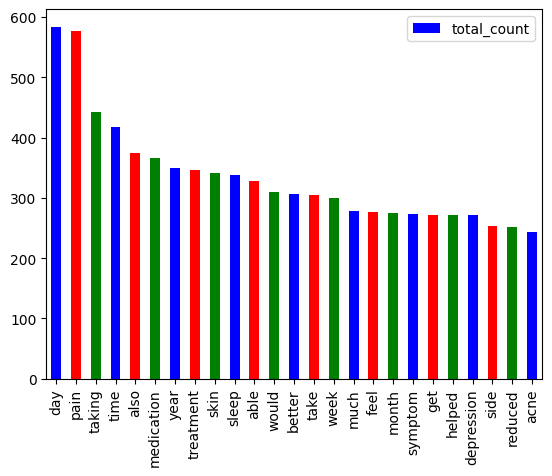

In [ ]:
TOP25.plot.bar(y='total_count', color = {"red", "blue", "green"})
plt.show()

In [ ]:
############### exclude top 10
#To want to reduce from Top 25 to Top 10 because Top 25 could include a lot of noise, so we do the middle 10

TD_matrix_EX10 = TD_matrix.sort_values(by ='total_count',ascending=False)[10:25]

EXTOP10 = TD_matrix_EX10.iloc[:,-1:]

EXTOP10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, able to acne
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_count  15 non-null     int64
dtypes: int64(1)
memory usage: 240.0+ bytes


In [ ]:

print(EXTOP10)


            total_count
able                328
would               310
better              306
take                305
week                299
much                278
feel                276
month               275
symptom             274
get                 272
helped              271
depression          271
side                254
reduced             251
acne                243


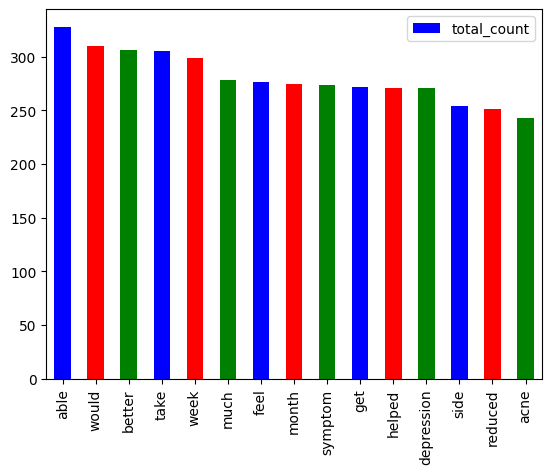

In [ ]:
EXTOP10.plot.bar(y='total_count', color = {"red", "blue", "green"})
plt.show()


In [ ]:

#################################### more insights using n-gram
""" ngrams can provide more insigths than a just a single word """

def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):

    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to),
                          max_features = max_features,
                          stop_words=stop_words_list).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]


In [ ]:
unigrams = get_ngrams(twDF_PP['benefitsReview'], ngram_from=3, ngram_to=3, n=50)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Trigram", "Frequency"]    #Trigram means text with three words using the scienceskit package
unigrams_df.head(10)  #Display the top 10 trigram

#n-gram using the natural language toolkit


,Trigram,Frequency
0,high blood pressure,15
1,lower blood pressure,15
2,lowered blood pressure,12
3,feel much better,8
4,first time years,8
5,reduced blood pressure,8
6,mg per day,7
7,hot flashes night,7
8,flashes night sweats,7
9,within minutes taking,7


In [ ]:

######################################### N-gram with NLTK (n-gram using the natural language processing toolkit)
"""
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
"""
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [ ]:
words = basic_clean(''.join(str(twDF_PP['benefitsReview'].tolist())))


In [ ]:

#ngram for 2 and 3 words in line 161 and 162
pd.Series(nltk.ngrams(words, 2)).value_counts()[:10]   #ngram for 2 words
pd.Series(nltk.ngrams(words, 3)).value_counts()[:10]   #ngram for 3 words

words[:20]  # bag of word

['slowed',
 'progression',
 'left',
 'ventricular',
 'dysfunction',
 'overt',
 'heart',
 'failure',
 'although',
 'type',
 'birth',
 'control',
 'con',
 'pro',
 'help',
 'cramp',
 'also',
 'effective',
 'prevention',
 'pregnancy']

In [ ]:

#ngram with specific words e.g experience with three words  --- we can also use science a course crucial for and in jobskills
def ngram_filter(doc, word, n):
    tokens = doc.split()
    all_ngrams = ngrams(tokens, n)
    filtered_ngrams = [x for x in all_ngrams if word in x]
    return filtered_ngrams


In [ ]:
#We should check for field (science) and other skills relevants (Customer relationship management) or other words we want to check for specifics to give us a cliq about our search in this case its jobskills
words = ''.join(str(twDF_PP['benefitsReview'].tolist()))
ngram_filter(words, 'pain', 3)

[('take', 'the', 'pain'),
 ('the', 'pain', 'away'),
 ('pain', 'away', 'completely'),
 ('with', 'the', 'pain'),
 ('the', 'pain', 'but'),
 ('pain', 'but', 'the'),
 ('experience', 'pelvic', 'pain'),
 ('pelvic', 'pain', 'and'),
 ('pain', 'and', 'other'),
 ('seizures', 'and', 'pain'),
 ('and', 'pain', 'from'),
 ('pain', 'from', 'the'),
 ('good', 'for', 'pain'),
 ('for', 'pain', 'they'),
 ('pain', 'they', 'had'),
 ('horrible', 'the', 'pain'),
 ('the', 'pain', 'was'),
 ('pain', 'was', 'preferable'),
 ('the', 'best', 'pain'),
 ('best', 'pain', 'drug'),
 ('pain', 'drug', 'they'),
 ("'very", 'effective', 'pain'),
 ('effective', 'pain', "killer',"),
 ('pain', "killer',", "'eventually"),
 ('my', 'stomach', 'pain'),
 ('stomach', 'pain', 'subsided'),
 ('pain', 'subsided', 'the'),
 ('with', 'less', 'pain'),
 ('less', 'pain', 'than'),
 ('pain', 'than', 'before'),
 ("drug',", "'my", 'pain'),
 ("'my", 'pain', 'and'),
 ('pain', 'and', 'anxiety'),
 ('that', 'muscle', 'pain'),
 ('muscle', 'pain', 'that'),


In [ ]:

#################### the word cloud ..
#stop_words_list
stop_words = ["pain", "PAIN", "Pain"] + list(STOPWORDS) + stop_words_list   #May not include this line of code professor didn't include it

data = dict(zip(TD_matrix.index.tolist(), TD_matrix['total_count'].tolist()))


wc = WordCloud(stopwords=STOPWORDS,width=500, height = 300, random_state = 21, max_font_size = 119).generate_from_frequencies(data)


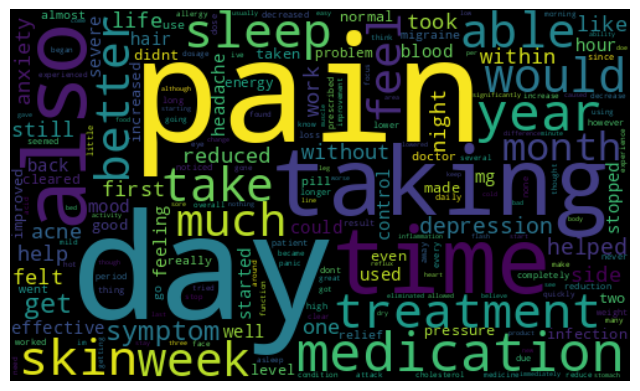

In [ ]:
plt.figure(figsize=(8, 12))

plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:

################################### benefitsReviews analysis #We do the benefitsReviews Analysis using the benefitsReviews analysis code
#The idea is when we look at some text it gives us an idea of what the text are related to

tf = cv.fit_transform(twDF_PP['benefitsReview']).toarray()

tf_feature_names = cv.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=6, learning_method="batch", max_iter=25, random_state=0) #We looked at 6 benefitsReviews where components = 6

lda.fit(tf)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LatentDirichletAllocation(max_iter=25, n_components=6, random_state=0)

In [ ]:

 #Displaying information i.e 10 words about the 6 benefitsReviews Topics (no_top_words = 10) which is 10 words for each benefitsReviews
def display_topics(lda, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(lda.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 3 words,Topic 4 words,Topic 5 words
0,depression,pain,skin,year,pain,blood
1,increased,sleep,acne,day,symptom,day
2,weight,able,also,time,infection,treatment
3,energy,night,reduced,feel,hair,acne
4,decreased,taking,improved,take,reduced,pressure
5,level,better,face,would,allergy,month
6,mood,day,line,work,acid,week
7,loss,helped,none,taking,treatment,time
8,treatment,without,eye,get,cholesterol,medication
9,month,get,reduction,like,day,taking


In [ ]:

############################################################## #We do our sentiment analysis here from line 219 - 223
## sentiment (Line 219 - 2233) and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

twDF_PP['Subjectivity'] = twDF_PP['benefitsReview'].apply(getSubjectivity)
twDF_PP['Polarity'] = twDF_PP['benefitsReview'].apply(getPolarity)
twDF_PP


,id,drugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Subjectivity,Polarity
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,NaN,NaN,0.150000,-0.158333
3,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",0.650000,0.550000
4,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,0.545238,-0.078571
5,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,0.195833,-0.091667
6,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,0.100000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4204,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,increased focus attention productivity better ...,"Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",0.353333,0.181667
4205,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,emotions were somewhat blunted less moodiness,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0.066667,-0.166667
4208,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,,Constant issues with the patch not staying on....,---,0.000000,0.000000
4209,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,controlled complex partial seizures,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,0.233333,-0.150000


In [ ]:

def getPolarityScore(score):   #sentiment analysis showing positive, negative and neutral results
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

twDF_PP['Sentiments'] = twDF_PP['Polarity'].apply(getPolarityScore)
twDF_PP['Sentiments'].value_counts()


Sentiments
Positive    1787
Negative     691
Neutral      611
Name: count, dtype: int64

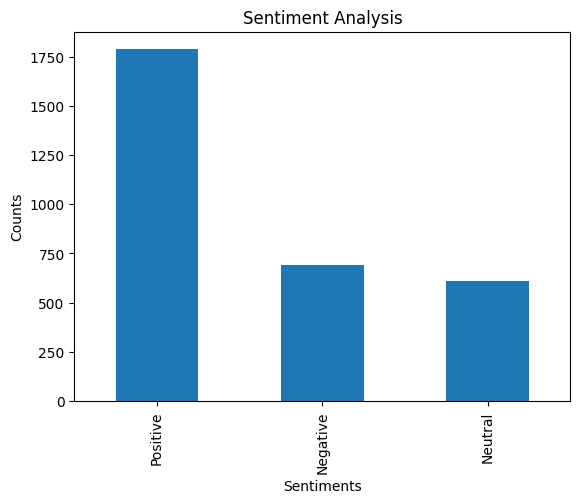

In [ ]:

plt.title('Sentiment Analysis')   #sentiment analysis plotted on graph
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twDF_PP['Sentiments'].value_counts().plot(kind= 'bar')
plt.show()


In [ ]:

twDF_PP['Polarity'].head()    #this line is use to export into a csv file for further analysis on polarity which are showing positive


0   -0.158333
3    0.550000
4   -0.078571
5   -0.091667
6    0.000000
Name: Polarity, dtype: float64

In [ ]:

PositiveDF = twDF_PP.query("Polarity > 0")["benefitsReview"]  #Code identifies the positive and create a dataframe
NegativeDF = twDF_PP.query("Polarity < 0")["benefitsReview"]  #Code identifies the negative and create a dataframe


In [ ]:

PositiveDF.to_csv('positive.csv')  #Code (positive file) is exported into a CSV file for further analysis
NegativeDF.to_csv('negative.csv')  #Code (negative file) is exported into a CSV file for further analysis


In [ ]:
#run the below commands to know where the two files are stored (file location)
import os
print(os.getcwd())


/content
